In [40]:
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Self:
    g_acc = None
    bb_acc = None
    d_acc = None
    bb_ong_acc = None
    epochs = None
    
    def trim(self, min_length=None):
        if min_length is None:
            min_length = min([len(self.g_acc), len(self.bb_acc), len(self.d_acc), len(self.bb_ong_acc)])
        
        self.g_acc = self.g_acc[:min_length]
        self.bb_acc = self.bb_acc[:min_length]
        self.d_acc = self.d_acc[:min_length]
        self.bb_ong_acc = self.bb_ong_acc[:min_length]
        
    @property
    def epochs(self):
        return np.array(range(len(self.g_acc))) + 1
        
    @property
    def df(self):
        self.trim()
        
        data = {
            'g_acc': self.g_acc,
            'bb_acc': self.bb_acc,
            'd_acc': self.d_acc,
            'bb_ong_acc': self.bb_ong_acc
        }
        df = pd.DataFrame(data, index=self.epochs)
        return df
    
    def rolling_mean(self, column, window):
        legend = []
        rolling = self.df[column].rolling(window=window).mean()
        return rolling

In [41]:
no_mit = Self()
metric_save_folder = os.path.join('checkpoints', 'save', 'run_0_2', 'metrics')

g_acc_file = os.path.join(metric_save_folder, 'g_acc.pkl')
with open(g_acc_file, 'rb') as f:
    no_mit.g_acc = pickle.load(f)

bb_acc_file = os.path.join(metric_save_folder, 'bb_acc.pkl')
with open(bb_acc_file, 'rb') as f:
    no_mit.bb_acc = pickle.load(f)

d_acc_file = os.path.join(metric_save_folder, 'd_acc.pkl')
with open(d_acc_file, 'rb') as f:
    no_mit.d_acc = pickle.load(f)

bb_ong_acc_file = os.path.join(metric_save_folder, 'bb_ong_acc.pkl')
with open(bb_ong_acc_file, 'rb') as f:
    no_mit.bb_ong_acc = pickle.load(f)

no_mit.trim()

In [42]:
mit_blind = Self()
metric_save_folder = os.path.join('checkpoints', 'save', 'run_8_2', 'metrics')

g_acc_file = os.path.join(metric_save_folder, 'g_acc.pkl')
with open(g_acc_file, 'rb') as f:
    mit_blind.g_acc = pickle.load(f)

bb_acc_file = os.path.join(metric_save_folder, 'bb_acc.pkl')
with open(bb_acc_file, 'rb') as f:
    mit_blind.bb_acc = pickle.load(f)

d_acc_file = os.path.join(metric_save_folder, 'd_acc.pkl')
with open(d_acc_file, 'rb') as f:
    mit_blind.d_acc = pickle.load(f)

bb_ong_acc_file = os.path.join(metric_save_folder, 'bb_ong_acc.pkl')
with open(bb_ong_acc_file, 'rb') as f:
    mit_blind.bb_ong_acc = pickle.load(f)

mit_blind.trim()

In [43]:
mit_smart = Self()
metric_save_folder = os.path.join('checkpoints', 'save', 'run_8_2-', 'metrics')

g_acc_file = os.path.join(metric_save_folder, 'g_acc.pkl')
with open(g_acc_file, 'rb') as f:
    mit_smart.g_acc = pickle.load(f)

bb_acc_file = os.path.join(metric_save_folder, 'bb_acc.pkl')
with open(bb_acc_file, 'rb') as f:
    mit_smart.bb_acc = pickle.load(f)

d_acc_file = os.path.join(metric_save_folder, 'd_acc.pkl')
with open(d_acc_file, 'rb') as f:
    mit_smart.d_acc = pickle.load(f)

bb_ong_acc_file = os.path.join(metric_save_folder, 'bb_ong_acc.pkl')
with open(bb_ong_acc_file, 'rb') as f:
    mit_smart.bb_ong_acc = pickle.load(f)

mit_smart.trim()

In [44]:
min_length = min([len(no_mit.g_acc), len(mit_blind.g_acc), len(mit_smart.g_acc)])
print(min_length)

no_mit.trim(min_length)
mit_blind.trim(min_length)
mit_smart.trim(min_length)

36


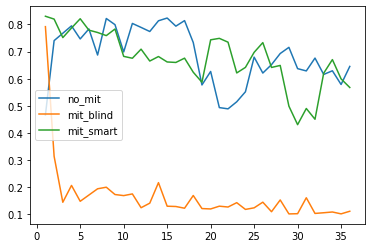

In [45]:
x = no_mit.epochs
plt.plot(x, no_mit.d_acc, '-', x, mit_blind.d_acc, '-', x, mit_smart.d_acc, '-')
plt.legend(['no_mit', 'mit_blind', 'mit_smart'])
plt.show()

In [50]:
columns = no_mit.df.columns

rm = {}
for col in columns:
    rm[col] = {
        'no_mit': no_mit.rolling_mean(col, window=5),
        'mit_blind': mit_blind.rolling_mean(col, window=5),
        'mit_smart': mit_smart.rolling_mean(col, window=5)
    }

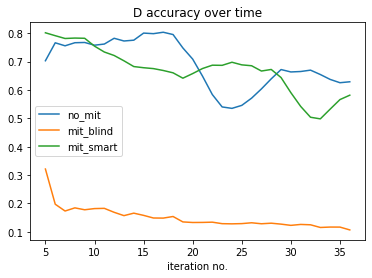

In [54]:
x = no_mit.epochs
plt.plot(x, rm['d_acc']['no_mit'], '-', x, rm['d_acc']['mit_blind'], '-', x, rm['d_acc']['mit_smart'], '-')
plt.legend(['no_mit', 'mit_blind', 'mit_smart'])
plt.title('D accuracy over time')
plt.xlabel('iteration no.')
plt.show()